In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
gene_expression = pd.read_csv('top_variable_genes_tpm.csv', index_col=0)
sample_metadata_2 = pd.read_csv('sample_metadata_2.csv', index_col=0)

In [7]:
sample_metadata_2

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,...,initial_weight,oct_embedded,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,ajcc_staging_system_edition,country_of_residence_at_enrollment,days_to_sample_procurement,figo_staging_edition_year,sample.aux
TCGA-13-1489-02A-01R-1565-13,TCGA-13-1489-02A-01R-1565-13,TCGA-13-1489,TCGA-13-1489-02A,TR,Recurrent Solid Tumor,TCGA-13-1489-02A,2,Recurrence,cba94907-4590-492b-88db-613d97208ccf,Recurrent Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-13-1489-02
TCGA-23-1023-01R-01R-1564-13,TCGA-23-1023-01R-01R-1564-13,TCGA-23-1023,TCGA-23-1023-01R,TP,Primary solid Tumor,TCGA-23-1023-01R,2,Recurrence,8a53cd24-5041-418b-811b-33b72c165798,Recurrent Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-23-1023-01
TCGA-24-2298-01A-01R-1569-13,TCGA-24-2298-01A-01R-1569-13,TCGA-24-2298,TCGA-24-2298-01A,TP,Primary solid Tumor,TCGA-24-2298-01A,1,Primary,96e08856-06cc-463d-b2c5-5ed29204f66e,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-24-2298-01
TCGA-24-2293-01A-01R-1568-13,TCGA-24-2293-01A-01R-1568-13,TCGA-24-2293,TCGA-24-2293-01A,TP,Primary solid Tumor,TCGA-24-2293-01A,1,Primary,542c8797-ff2c-49c6-955b-ef8222194b6d,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-24-2293-01
TCGA-20-1687-01A-01R-1566-13,TCGA-20-1687-01A-01R-1566-13,TCGA-20-1687,TCGA-20-1687-01A,TP,Primary solid Tumor,TCGA-20-1687-01A,1,Primary,bcd16bf3-0877-4e4b-b70b-7d6a497af7ac,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-20-1687-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-59-2354-01A-01R-1569-13,TCGA-59-2354-01A-01R-1569-13,TCGA-59-2354,TCGA-59-2354-01A,TP,Primary solid Tumor,TCGA-59-2354-01A,1,Primary,7ce668a0-da92-4201-9f07-2c5b02df2c88,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-59-2354-01
TCGA-13-0760-01A-01R-1564-13,TCGA-13-0760-01A-01R-1564-13,TCGA-13-0760,TCGA-13-0760-01A,TP,Primary solid Tumor,TCGA-13-0760-01A,1,Primary,f6508c57-7de6-489b-9615-12c56dc8d8af,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-13-0760-01
TCGA-13-0906-01A-01R-1564-13,TCGA-13-0906-01A-01R-1564-13,TCGA-13-0906,TCGA-13-0906-01A,TP,Primary solid Tumor,TCGA-13-0906-01A,1,Primary,a0c48680-3caf-49bd-b495-c9fd3a9cbe76,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-13-0906-01
TCGA-10-0926-01A-01R-1564-13,TCGA-10-0926-01A-01R-1564-13,TCGA-10-0926,TCGA-10-0926-01A,TP,Primary solid Tumor,TCGA-10-0926-01A,1,Primary,1c7e0067-e266-4967-9322-5967e112888e,Primary Tumor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-10-0926-01


In [8]:
print(gene_expression.columns)
print(sample_metadata_2.columns)

Index(['ENSG00000211592.8', 'ENSG00000210082.2', 'ENSG00000198712.1',
       'ENSG00000210196.2', 'ENSG00000198804.2', 'ENSG00000198938.2',
       'ENSG00000198886.2', 'ENSG00000198888.2', 'ENSG00000211459.2',
       'ENSG00000198840.2',
       ...
       'ENSG00000145494.12', 'ENSG00000143742.14', 'ENSG00000173915.16',
       'ENSG00000185624.15', 'ENSG00000123416.15', 'ENSG00000100804.19',
       'ENSG00000204983.14', 'ENSG00000188488.14', 'ENSG00000142871.18',
       'ENSG00000183255.12'],
      dtype='object', length=500)
Index(['barcode', 'patient', 'sample', 'shortLetterCode', 'definition',
       'sample_submitter_id', 'sample_type_id', 'tumor_descriptor',
       'sample_id', 'sample_type', 'composition', 'state',
       'preservation_method', 'intermediate_dimension',
       'pathology_report_uuid', 'submitter_id', 'shortest_dimension',
       'specimen_type', 'longest_dimension', 'is_ffpe', 'tissue_type',
       'morphology', 'treatments', 'tissue_or_organ_of_origin',
       '

In [9]:
columns_with_specific_unique_values = [
    column for column in sample_metadata_2.columns
    if 3 < sample_metadata_2[column].nunique() < 10
]
print(columns_with_specific_unique_values)

['tissue_or_organ_of_origin', 'classification_of_tumor', 'figo_stage', 'method_of_diagnosis', 'tumor_grade', 'residual_disease', 'race', 'days_to_collection', 'initial_weight']


In [10]:
sample_metadata_2['classification_of_tumor'].nunique()

6

In [11]:
# For your target variable
class_distribution = sample_metadata_2['classification_of_tumor'].value_counts()
print(class_distribution)

primary                279
recurrence              86
Unknown                 37
metastasis              15
Progression             10
Synchronous primary      2
Name: classification_of_tumor, dtype: int64


In [12]:
# Scale the gene expression data so that each gene has mean 0 and std 1.
scaler = StandardScaler()
gene_expression_scaled = pd.DataFrame(
    scaler.fit_transform(gene_expression),
    index=gene_expression.index,
    columns=gene_expression.columns
)
gene_expression_scaled.head()

,ENSG00000211592.8,ENSG00000210082.2,ENSG00000198712.1,ENSG00000210196.2,ENSG00000198804.2,ENSG00000198938.2,ENSG00000198886.2,ENSG00000198888.2,ENSG00000211459.2,ENSG00000198840.2,...,ENSG00000145494.12,ENSG00000143742.14,ENSG00000173915.16,ENSG00000185624.15,ENSG00000123416.15,ENSG00000100804.19,ENSG00000204983.14,ENSG00000188488.14,ENSG00000142871.18,ENSG00000183255.12
TCGA-13-1489-02A-01R-1565-13,-0.460475,-0.701708,-0.138623,2.100219,-1.562969,-1.194610,-1.469248,-1.515213,-0.273325,-0.606883,...,0.710877,-0.944687,0.730651,-0.204001,-0.964488,0.870422,0.120120,-0.390914,-0.689978,-0.949704
TCGA-23-1023-01R-01R-1564-13,-0.011258,-0.990007,-0.265295,-0.809804,-0.298257,0.711268,-1.225338,-0.711027,-0.193566,-1.441654,...,-0.283906,0.003166,-0.703974,2.812569,0.068307,0.559959,-0.191058,-0.452089,0.703952,2.210110
TCGA-24-2298-01A-01R-1569-13,-0.440567,0.867413,-1.140932,0.154761,0.108158,-0.413116,0.588764,2.328670,0.428755,-0.014575,...,0.762042,-0.602141,-0.027414,0.765489,0.064132,0.360975,-0.167652,5.963100,1.943383,0.040308
TCGA-24-2293-01A-01R-1568-13,-0.069464,0.160972,0.573173,-0.624589,0.802841,1.540739,0.554748,0.776298,-0.310856,-0.627151,...,-0.583022,-0.652889,-0.848730,1.094782,0.339349,-0.297065,-0.182119,0.045875,2.133064,0.376496
TCGA-20-1687-01A-01R-1566-13,-0.355806,0.360679,1.043244,0.535455,0.890110,0.460565,1.150089,1.218996,-0.000025,1.592368,...,-0.464534,-1.010533,-0.830303,-0.616365,-0.878914,-0.800173,-0.167844,-0.312353,-0.298968,-0.483139


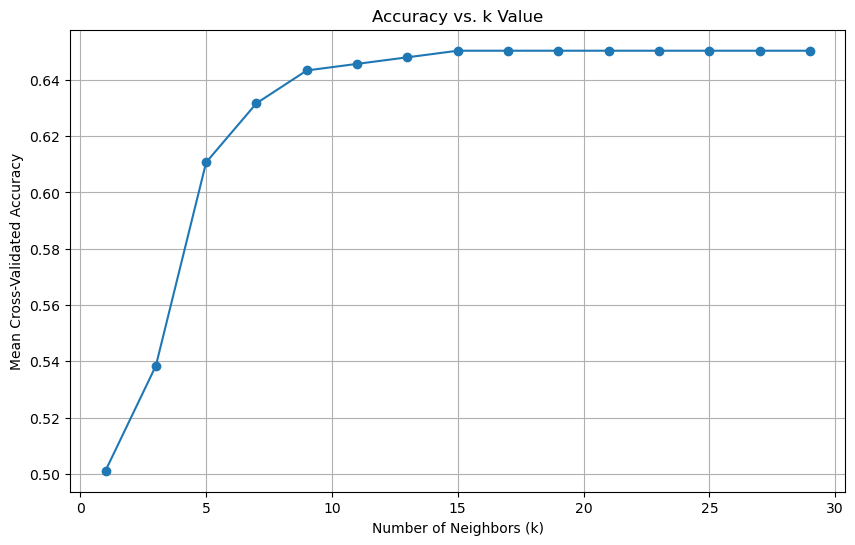

The optimal k value is 15


In [13]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Extract the target variable from metadata using the 'classification of tumor'
target = sample_metadata_2.loc[gene_expression.index, 'classification_of_tumor']

# Test a range of k values
k_values = list(range(1, 31, 2))  # Test odd values from 1 to 29
cv_scores = []

# Using cv = 2 because there are only two samples in the 'Synchronous primary' class
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, gene_expression_scaled, target, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, 'o-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Accuracy vs. k Value')
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal k value is {optimal_k}")

In [16]:
# Split the scaled data and target into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    gene_expression_scaled, target, test_size=0.3, random_state=42
)

# Initialize the KNN classifier (k = 15)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predict on the test set and evaluate the classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6201550387596899
                     precision    recall  f1-score   support

        Progression       0.00      0.00      0.00         4
Synchronous primary       0.00      0.00      0.00         1
            Unknown       0.00      0.00      0.00        10
         metastasis       0.00      0.00      0.00         3
            primary       0.62      1.00      0.77        80
         recurrence       0.00      0.00      0.00        31

           accuracy                           0.62       129
          macro avg       0.10      0.17      0.13       129
       weighted avg       0.38      0.62      0.47       129



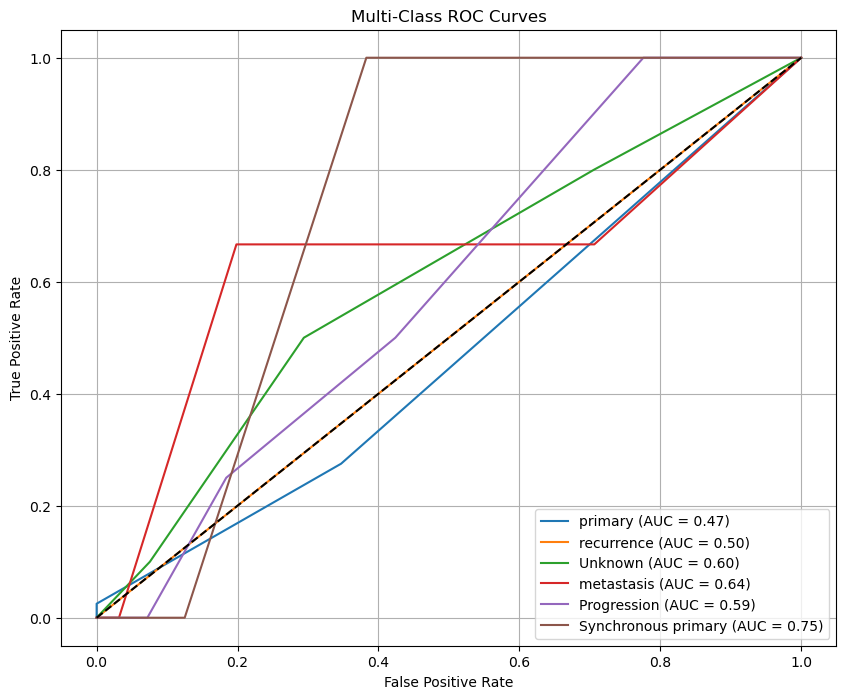

Macro-average AUC: 0.59


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Convert y_test into binary format (one-hot encoding for multi-class)
classes = ['primary', 'recurrence', 'Unknown', 'metastasis', 'Progression', 'Synchronous primary']
y_test_binary = label_binarize(y_test, classes=classes)

# Get predicted probabilities for each class
y_pred_proba = knn.predict_proba(X_test)

# Initialize variables to store results
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC score for each class
for i, class_name in enumerate(classes):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
    roc_auc[class_name] = roc_auc_score(y_test_binary[:, i], y_pred_proba[:, i])

# Compute macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for class_name in classes:
    plt.plot(fpr[class_name], tpr[class_name], label=f"{class_name} (AUC = {roc_auc[class_name]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Macro-average AUC: {macro_auc:.2f}")

<Figure size 1000x800 with 0 Axes>

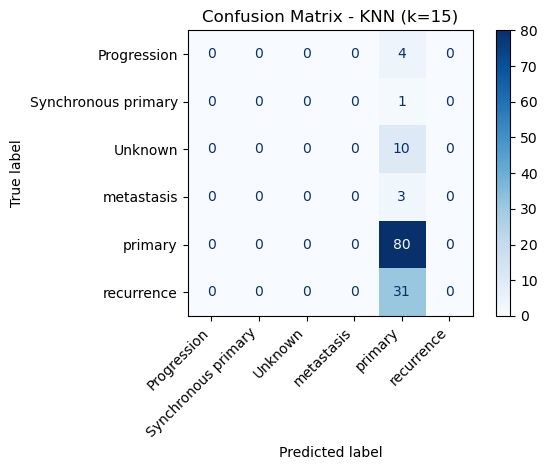

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and plot confusion matrix display
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - KNN (k=15)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()